Task Description
Choose a classification dataset (categorical target variable), such as:

Medical diagnosis

Customer churn

Iris dataset

Any other suitable classification dataset

Split the data into training and test sets.

1. Tree-Based Models
(Note: Decision Trees were introduced in the previous exercise)

Implement three different tree-based classification models using scikit-learn:

Decision Tree Classifier

Random Forest Classifier

Gradient Boosted Trees Classifier

Train each model and generate predictions on the test set.

2. K-Nearest Neighbors (KNN) Model
Implement the K-Nearest Neighbors (KNN) classifier

Test multiple values of k (e.g., k = 1 to 20)

Plot model performance against different k-values

Identify the optimal value of k

3. Evaluation Metrics
Evaluate all models using the following metrics:

Accuracy

Precision

Recall

F1-score

Present the results in a clear table or summary.

Using the dataset :- Strokedata

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('D:/Ritu/Stats Individual Assgn/strokedata.csv')

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.drop(columns=['id'], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [8]:
df["bmi"] = df["bmi"].fillna(df["bmi"].median())


In [9]:
#target and features
X = df.drop(columns=["stroke"])
y = df["stroke"]

In [10]:
# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

In [11]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [12]:
#tree based model
tree_models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=150, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = []

for name, model in tree_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1-score": f1_score(y_test, y_pred, zero_division=0)
    })


In [13]:
#knn model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = range(1, 21)
knn_accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    knn_accuracy.append(accuracy_score(y_test, y_pred))

# Optimal k
optimal_k = k_values[np.argmax(knn_accuracy)]

# Final KNN model
knn_final = KNeighborsClassifier(n_neighbors=optimal_k, n_jobs=-1)
knn_final.fit(X_train_scaled, y_train)
y_pred_knn = knn_final.predict(X_test_scaled)

results.append({
    "Model": f"KNN (k={optimal_k})",
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "Precision": precision_score(y_test, y_pred_knn, zero_division=0),
    "Recall": recall_score(y_test, y_pred_knn, zero_division=0),
    "F1-score": f1_score(y_test, y_pred_knn, zero_division=0)
})


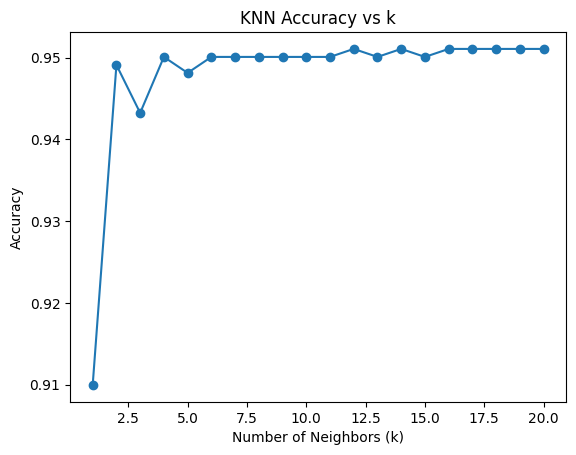

In [14]:
#plot accuracy vs k
plt.figure()
plt.plot(k_values, knn_accuracy, marker="o")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k")
plt.show()

In [15]:
#results table
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

print(f"\nOptimal value of k for KNN: {optimal_k}")

            Model  Accuracy  Precision  Recall  F1-score
    Decision Tree  0.909980   0.137931    0.16  0.148148
    Random Forest  0.949119   0.000000    0.00  0.000000
Gradient Boosting  0.948141   0.000000    0.00  0.000000
       KNN (k=12)  0.951076   0.000000    0.00  0.000000

Optimal value of k for KNN: 12
